Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514/EEL7513 - Introdução ao Aprendizado de Máquina

**Aluno:** Rodrigo Kobashikawa Rosa<br>
**Matrícula:** 14201073
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\calS}{\mathcal{S}}$


# Exercício 7: Redes Neurais II

Neste exercício você irá construir modelos de redes neurais para realizar classificação e regressão.

# Conjunto de dados #1

Para conjunto XOR do exercício anterior, treine uma rede neural de 2 camadas para classificação usando os métodos de treinamento SGD e ADAM. Utilize primeiramente a biblioteca sklearn e depois repita usando Keras/TensorFlow. Certifique-se de usar uma taxa de aprendizagem adequada. 

### Dicas
- Se tiver problemas para instalar o TensorFlow segundo as instruções do site, experimente usar simplesmente: ``pip install tensorflow``
- Para verificar a curva de perda no treinamento, você pode utilizar `model.loss_curve_` no sklearn. No Keras, utilize 

```python
history = model.fit(...)
history.history['loss']
```

# Conjunto de dados #2



O segundo conjunto de dados é o conjunto de dígitos manuscritos MNIST, o qual possui 70000 amostras, sendo 10000 amostras de teste. O conjunto pode ser facilmente carregado pelos comandos abaixo.

In [15]:
from sklearn.datasets import fetch_mldata
data = fetch_mldata('MNIST original', data_home='./data')

(70000, 784) (70000,)


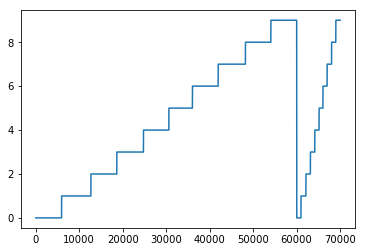

In [16]:
X = data.data
y = data.target
plt.plot(y)
print(X.shape, y.shape)

O seu objetivo para esta parte é conseguir pelo menos 96% de acurácia no conjunto de teste, tanto com a biblioteca sklearn quanto keras/tensorflow. Fique à vontade para variar quaisquer hiperparâmetros do modelo ou do treinamento.

Utilize necessariamente algum algoritmo de treinamento estocástico que trabalhe com mini-batches; algoritmos de segunda ordem, que somente trabalham em modo batch (i.e., que utiliza todo o conjunto de treinamento a cada iteração), serão excessivamente lentos para um conjunto de dados tão extenso. Uma grande vantagem dos métodos estocásticos é que sua complexidade (para um dado desempenho) não aumenta com o tamanho do conjunto de treinamento. Por quê isso acontece?

# Artigos

Ler e elaborar uma breve apresentação sobre os seguintes temas:
- Early stopping
- Dropout
- Batch normalization
- Data augmentation

---

# Resolução

## Bibliotecas

In [42]:
import pandas as pd
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from scipy.special import expit as sigmoid
from sklearn.datasets import fetch_mldata

import h5py
import time

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.nn import relu, softmax
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import normalize
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam, SGD

## Funções

### Funções de plot

In [2]:
def plot_data(X, y):
    ''' Plot 2-D binary dataset '''
    if len(y.shape) > 1: raise RuntimeError('y must be a 1-D array')
    plt.plot(X[y!=1,0],X[y!=1,1],'bo',X[y==1,0],X[y==1,1],'rx')
    return

def plot_boundary(model, X, N=100):
    ''' Plot boundary for a 2-D binary classifier '''
    from scipy.special import logit
    x1 = np.linspace(X[:,0].min(), X[:,0].max(), N)
    x2 = np.linspace(X[:,1].min(), X[:,1].max(), N)
    xx1, xx2 = np.meshgrid(x1, x2)
    X = np.c_[xx1.reshape(-1), xx2.reshape(-1)]
    z = logit(model.predict_proba(X)[:,1].reshape(xx1.shape))
    plt.contourf(xx1,xx2,np.sign(z),cmap=plt.cm.bwr,vmin=-3,vmax=3)
    plt.contour(xx1,xx2,z,cmap=plt.cm.gray,vmin=np.inf,vmax=np.inf,levels=[0])
    return

## Conjunto de dados #1

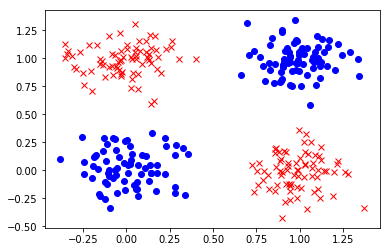

In [27]:
X, y = make_blobs(n_samples=400, n_features=2, centers=[[0,0],[1,1],[0,1],[1,0]], cluster_std=0.15, random_state=0)
y = (y >= 2).astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)
plot_data(X_train,y_train)

Train accuracy: 1.0
Test accuracy: 1.0


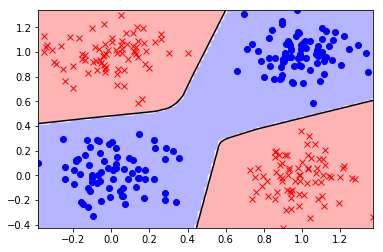

In [138]:
model = MLPClassifier(hidden_layer_sizes=(20,20,), activation='relu', solver='adam',alpha = 1e-4,learning_rate_init=0.01,learning_rate='adaptive')
model.fit(X_train, y_train)
plot_boundary(model, X_train)
plot_data(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))
print('Test accuracy:',model.score(X_test, y_test))

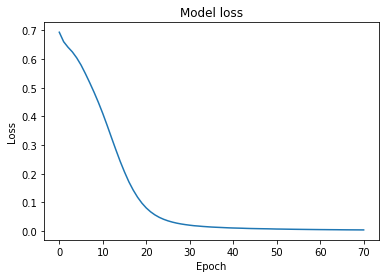

In [139]:
plt.plot(model.loss_curve_)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

XOR-model-lr-0.0001-1537720195
Train on 300 samples, validate on 100 samples
Epoch 1/10
300/300 [==============================] - 1s 2ms/step - loss: 0.7004 - acc: 0.5033 - val_loss: 0.6909 - val_acc: 0.5800
Epoch 2/10
300/300 [==============================] - 0s 911us/step - loss: 0.6991 - acc: 0.5667 - val_loss: 0.6897 - val_acc: 0.6300
Epoch 3/10
300/300 [==============================] - 0s 928us/step - loss: 0.6978 - acc: 0.5867 - val_loss: 0.6886 - val_acc: 0.6600
Epoch 4/10
300/300 [==============================] - 0s 924us/step - loss: 0.6966 - acc: 0.6000 - val_loss: 0.6875 - val_acc: 0.6700
Epoch 5/10
300/300 [==============================] - 0s 941us/step - loss: 0.6954 - acc: 0.6200 - val_loss: 0.6863 - val_acc: 0.6700
Epoch 6/10
300/300 [==============================] - 0s 615us/step - loss: 0.6942 - acc: 0.6300 - val_loss: 0.6854 - val_acc: 0.6800
Epoch 7/10
300/300 [==============================] - 0s 912us/step - loss: 0.6930 - acc: 0.6367 - val_loss: 0.6843 - val

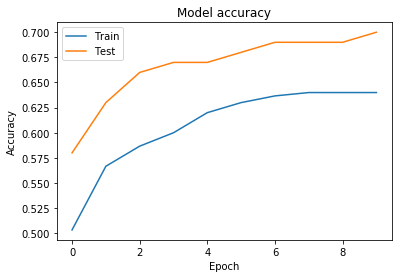

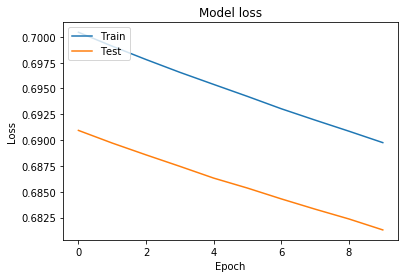

XOR-model-lr-0.001-1537720204
Train on 300 samples, validate on 100 samples
Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 0.6945 - acc: 0.6700 - val_loss: 0.6873 - val_acc: 0.7000
Epoch 2/10
300/300 [==============================] - 0s 598us/step - loss: 0.6756 - acc: 0.7067 - val_loss: 0.6691 - val_acc: 0.7100
Epoch 3/10
300/300 [==============================] - 0s 572us/step - loss: 0.6575 - acc: 0.7200 - val_loss: 0.6493 - val_acc: 0.7300
Epoch 4/10
300/300 [==============================] - 0s 592us/step - loss: 0.6373 - acc: 0.7333 - val_loss: 0.6270 - val_acc: 0.7400
Epoch 5/10
300/300 [==============================] - 0s 332us/step - loss: 0.6141 - acc: 0.7400 - val_loss: 0.5977 - val_acc: 0.7700
Epoch 6/10
300/300 [==============================] - 0s 339us/step - loss: 0.5845 - acc: 0.8333 - val_loss: 0.5632 - val_acc: 0.9400
Epoch 7/10
300/300 [==============================] - 0s 324us/step - loss: 0.5499 - acc: 0.9400 - val_loss: 0.5257 - val_

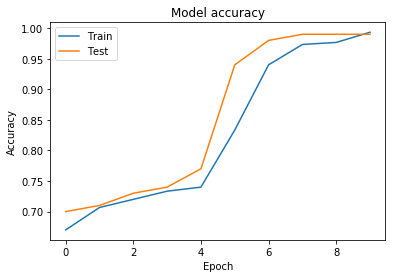

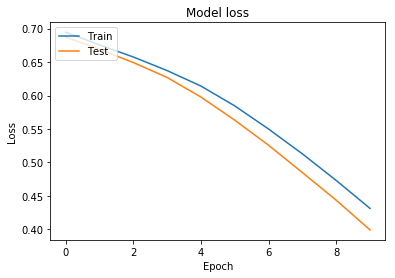

XOR-model-lr-0.01-1537720212
Train on 300 samples, validate on 100 samples
Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 0.5064 - acc: 0.8867 - val_loss: 0.3176 - val_acc: 0.9900
Epoch 2/10
300/300 [==============================] - 0s 615us/step - loss: 0.1832 - acc: 0.9800 - val_loss: 0.0750 - val_acc: 1.0000
Epoch 3/10
300/300 [==============================] - 0s 489us/step - loss: 0.0427 - acc: 0.9967 - val_loss: 0.0265 - val_acc: 1.0000
Epoch 4/10
300/300 [==============================] - 0s 329us/step - loss: 0.0182 - acc: 1.0000 - val_loss: 0.0160 - val_acc: 1.0000
Epoch 5/10
300/300 [==============================] - 0s 777us/step - loss: 0.0128 - acc: 1.0000 - val_loss: 0.0121 - val_acc: 1.0000
Epoch 6/10
300/300 [==============================] - 0s 947us/step - loss: 0.0094 - acc: 1.0000 - val_loss: 0.0088 - val_acc: 1.0000
Epoch 7/10
300/300 [==============================] - 0s 974us/step - loss: 0.0081 - acc: 1.0000 - val_loss: 0.0117 - val_a

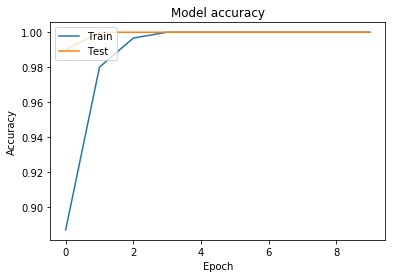

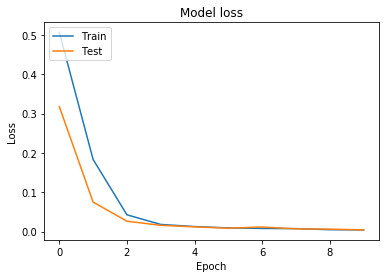

XOR-model-lr-0.1-1537720221
Train on 300 samples, validate on 100 samples
Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2529 - acc: 0.8833 - val_loss: 0.2455 - val_acc: 0.9600
Epoch 2/10
300/300 [==============================] - 0s 838us/step - loss: 0.0734 - acc: 0.9867 - val_loss: 0.6084 - val_acc: 0.9300
Epoch 3/10
300/300 [==============================] - 0s 544us/step - loss: 0.2686 - acc: 0.9467 - val_loss: 1.0072 - val_acc: 0.7700
Epoch 4/10
300/300 [==============================] - 0s 326us/step - loss: 0.2035 - acc: 0.9600 - val_loss: 0.0170 - val_acc: 1.0000
Epoch 5/10
300/300 [==============================] - 0s 322us/step - loss: 0.0290 - acc: 0.9833 - val_loss: 0.0112 - val_acc: 0.9900
Epoch 6/10
300/300 [==============================] - 0s 638us/step - loss: 0.0201 - acc: 0.9867 - val_loss: 0.0056 - val_acc: 1.0000
Epoch 7/10
300/300 [==============================] - 0s 645us/step - loss: 0.0096 - acc: 0.9967 - val_loss: 0.0037 - val_ac

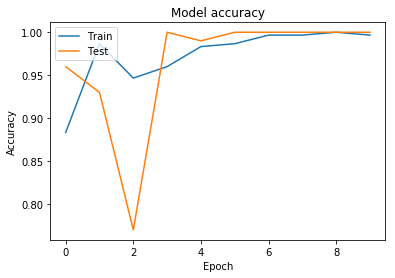

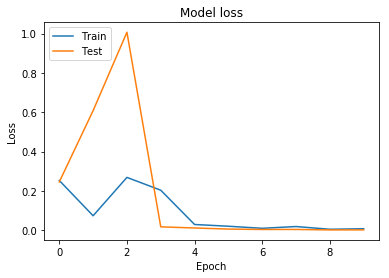

In [140]:
learning_rate = [0.0001, 0.001, 0.01, 0.1]
for rate in learning_rate:
    NAME = f"XOR-model-lr-{rate}-{int(time.time())}"
    print(NAME)
    
    model = Sequential()

    model.add(Dense(20, input_shape=X_train.shape[1:], activation='relu'))

    model.add(Dense(20, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    tensorboard = TensorBoard(log_dir=f"logs/{NAME}")

    adam = Adam(lr=rate)

    model.compile(optimizer=adam,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train, y_train,
              batch_size=16,
              epochs=10,
              validation_data=(X_test,y_test),
              callbacks=[tensorboard])
    
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [143]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_107 (Dense)            (None, 20)                60        
_________________________________________________________________
dense_108 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_109 (Dense)            (None, 1)                 21        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


## Conjunto de dados #2

In [144]:
from sklearn.datasets import fetch_mldata
data = fetch_mldata('MNIST original', data_home='./data')

(70000, 784) (70000,)


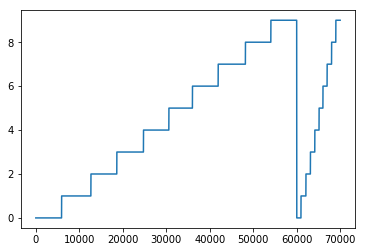

In [145]:
X = data.data
y = data.target
plt.plot(y)
print(X.shape, y.shape)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=0)

In [161]:
X_train = X_train/255.0
X_test = X_test/255.0

In [162]:
X_train.shape

(60000, 784)

In [164]:
model = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam',learning_rate='adaptive')
model.fit(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))
print('Test accuracy:',model.score(X_test, y_test))

Train accuracy: 0.9998333333333334
Test accuracy: 0.9701


In [166]:
NAME = f"MNIST-model-{int(time.time())}"
print(NAME)

model = Sequential()

model.add(Dense(128, input_shape=X_train.shape[1:], activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

tensorboard = TensorBoard(log_dir=f"logs/{NAME}")

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
          epochs=3,
          validation_data=(X_test,y_test),
          callbacks=[tensorboard])

MNIST-model-1537722145
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 12s 193us/step - loss: 0.2271 - acc: 0.9329 - val_loss: 0.1489 - val_acc: 0.9523
Epoch 2/3
60000/60000 [==============================] - 16s 272us/step - loss: 0.0961 - acc: 0.9700 - val_loss: 0.1031 - val_acc: 0.9676
Epoch 3/3
60000/60000 [==============================] - 11s 180us/step - loss: 0.0660 - acc: 0.9787 - val_loss: 0.1023 - val_acc: 0.9683


In [167]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_143 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_144 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_145 (Dense)            (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


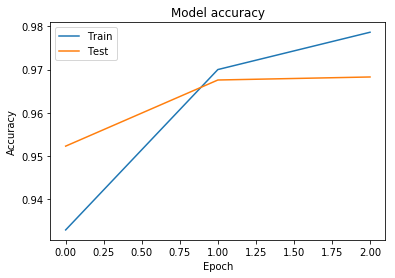

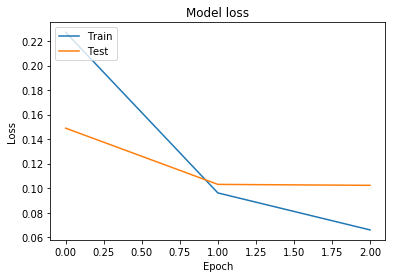

In [168]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Early Stopping

Early-stopping combats overfitting interrupting the training procedure once model’s performance on a validation set gets worse. A validation set is a set of examples that we never use for gradient descent, but which is also not a part of the test set. The validation examples are considered to be representative of future test examples. Early stopping is effectively tuning the hyper-parameter number of epochs/steps.

Intuitively as the model sees more data and learns patterns and correlations, both training and test error go down. After enough passes over training data the model might start overfitting and learning noise in the given training set. In this case training error would continue going down while test error (how well we generalize) would get worse. Early stopping is all about finding this right moment with minimum test error.

### Dropout

Simply put, dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. By “ignoring”, I mean these units are not considered during a particular forward or backward pass.

More technically, At each training stage, individual nodes are either dropped out of the net with probability 1-p or kept with probability p, so that a reduced network is left; incoming and outgoing edges to a dropped-out node are also removed.

A fully connected layer occupies most of the parameters, and hence, neurons develop co-dependency amongst each other during training which curbs the individual power of each neuron leading to over-fitting of training data.

Some Observations:
* Dropout forces a neural network to learn more robust features that are useful in conjunction with many different random subsets of the other neurons.
* Dropout roughly doubles the number of iterations required to converge. However, training time for each epoch is less.
* With H hidden units, each of which can be dropped, we have 2^H possible models. In testing phase, the entire network is considered and each activation is reduced by a factor p.

### Batch Normalization

Batch normalization reduces the amount by what the hidden unit values shift around (covariance shift).

How does batch normalization work?

To increase the stability of a neural network, batch normalization normalizes the output of a previous activation layer by subtracting the batch mean and dividing by the batch standard deviation.

However, after this shift/scale of activation outputs by some randomly initialized parameters, the weights in the next layer are no longer optimal. SGD ( Stochastic gradient descent) undoes this normalization if it’s a way for it to minimize the loss function.

Consequently, batch normalization adds two trainable parameters to each layer, so the normalized output is multiplied by a “standard deviation” parameter (gamma) and add a “mean” parameter (beta). In other words, batch normalization lets SGD do the denormalization by changing only these two weights for each activation, instead of losing the stability of the network by changing all the weights.

* We can use higher learning rates because batch normalization makes sure that there’s no activation that’s gone really high or really low. And by that, things that previously couldn’t get to train, it will start to train.
* It reduces overfitting because it has a slight regularization effects. Similar to dropout, it adds some noise to each hidden layer’s activations. Therefore, if we use batch normalization, we will use less dropout, which is a good thing because we are not going to lose a lot of information. However, we should not depend only on batch normalization for regularization; we should better use it together with dropout.

### Data Augmentation

In the real world scenario, we may have a dataset of images taken in a limited set of conditions. But, our target application may exist in a variety of conditions, such as different orientation, location, scale, brightness etc. We account for these situations by training our neural network with additional synthetically modified data.

Popular Augmentation Techniques
* Flip
* Rotation
* Scale 
* Crop
* Translation
* Gaussian Noise

GANs, Neural Style Transfer, Interpolation (Constant, Edge, Reflect, Symmetric, Wrap)